In [1]:
import pandas as pd

In [2]:
judges_appointments = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-06-10/judges_appointments.csv')
judges_people = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-06-10/judges_people.csv')

In [3]:
judges_appointments

,judge_id,court_name,court_type,president_name,president_party,nomination_date,predecessor_last_name,predecessor_first_name,senate_confirmation_date,commission_date,chief_judge_begin,chief_judge_end,retirement_from_active_service,termination_date,termination_reason
0,3419,"U. S. District Court, Southern District of New...",USDC,Barack Obama,Democratic,07/28/2011,Kaplan,Lewis A.,03/22/2012,03/23/2012,NaN,NaN,NaN,NaN,NaN
1,1,"U. S. District Court, Eastern District of New ...",USDC,Franklin D. Roosevelt,Democratic,02/03/1936,new,NaN,02/12/1936,02/15/1936,NaN,NaN,02/15/1966,05/28/1971,Death
2,2,"U. S. District Court, Western District of Penn...",USDC,Rutherford B. Hayes,Republican,01/06/1880,Ketcham,Winthrop,01/14/1880,01/14/1880,NaN,NaN,NaN,02/09/1891,Appointment to Another Judicial Position
3,3,"U. S. District Court, Northern District of Ala...",USDC,Ronald Reagan,Republican,07/22/1982,McFadden,Frank H.,08/18/1982,08/18/1982,NaN,NaN,05/31/1996,NaN,NaN
4,4,"U. S. District Court, District of New Jersey",USDC,Jimmy Carter,Democratic,09/28/1979,Barlow,George H.,10/31/1979,11/02/1979,NaN,NaN,02/15/1994,12/02/2009,Death
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197,2201,"U. S. District Courts, Albemarle, Cape Fear & ...",USDC,Reassignment,Reassignment,NaN,new,NaN,NaN,02/13/1801,NaN,NaN,NaN,03/04/1802,Death
4198,2689,"U. S. District Court, Eastern District of Miss...",USDC,Harry S Truman,Democratic,01/13/1949,Harper,Roy Winfield,01/31/1949,02/02/1949,NaN,NaN,01/05/1971,02/13/1994,Death
4199,1126,U. S. Court of Appeals for the Ninth Circuit,USCA,William H. Taft,Republican,12/12/1910,new,NaN,01/31/1911,02/08/1911,NaN,NaN,01/31/1928,11/30/1928,Retirement
4200,1453,U. S. Court of Appeals for the Second Circuit,USCA,Reassignment,Reassignment,NaN,new,NaN,NaN,07/01/1929,NaN,NaN,09/06/1940,09/05/1943,Death


In [4]:
judges_appointments['commission_date'] = pd.to_datetime(judges_appointments['commission_date'])
judges_appointments['commission_date'].dt.year.min()

1789.0

In [5]:
judges_people

,judge_id,name_first,name_middle,name_last,name_suffix,birth_date,birthplace_city,birthplace_state,death_date,death_city,death_state,gender,race
0,3419,Ronnie,NaN,Abrams,NaN,1968.0,New York,NY,NaN,NaN,NaN,F,White
1,1,Matthew,T.,Abruzzo,NaN,1889.0,Brooklyn,NY,1971.0,Potomac,MD,M,White
2,2,Marcus,Wilson,Acheson,NaN,1828.0,Washington,PA,1906.0,Pittsburgh,PA,M,White
3,3,William,Marsh,Acker,Jr.,1927.0,Birmingham,AL,NaN,NaN,NaN,M,White
4,4,Harold,Arnold,Ackerman,NaN,1928.0,Newark,NJ,2009.0,West Orange,NJ,M,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3527,3391,Jennifer,Guerin,Zipps,NaN,1964.0,Ashland,OH,NaN,NaN,NaN,F,White
3528,2687,Alfonso,Joseph,Zirpoli,NaN,1905.0,Denver,CO,1995.0,San Francisco,CA,M,White
3529,2688,William,J.,Zloch,NaN,1944.0,Fort Lauderdale,FL,NaN,NaN,NaN,M,White
3530,2690,Rya,Weickert,Zobel,NaN,1931.0,Zwickau,Germany,NaN,NaN,NaN,F,White


In [6]:
judges_people.groupby(["gender"]).size()

gender
F     389
M    3143
dtype: int64

In [7]:
judges_people['race']=judges_people['race'].fillna("Others")

In [8]:
df_grp = judges_people.groupby(["gender","race"]).count().sort_values(["gender","judge_id"], ascending=[True,False])
df_grp

judge_id  name_first  name_middle  name_last  \
gender race                                                                 
F      White                      293         293          265        293   
       African American            51          51           50         51   
       Hispanic                    29          29           21         29   
       Asian American               9           9            9          9   
       Others                       3           3            3          3   
       African Am./Hispanic         1           1            1          1   
       American Indian              1           1            1          1   
       Hispanic/Asian Am.           1           1            0          1   
       White/Asian Am.              1           1            0          1   
M      White                     2871        2871         2483       2871   
       African American           150         150          135        150   
       Hispanic                    87          87           70         87   
       Asian American              22          22           18         22   
       Others                       6           6            6          6   
       American Indian              2           2            2          2   
       Pac. Isl./Asian Am.          2           2            2          2   
       African Am./Hispanic         1           1            1          1   
       Hispanic/White               1           1            1          1   
       Pac. Isl./White              1           1            1          1   

                             name_suffix  birth_date  birthplace_city  \
gender race                                                             
F      White                           0         293              293   
       African American                0          51               51   
       Hispanic                        0          29               29   
       Asian American                  0           9                9   
       Others                          0           3                3   
       African Am./Hispanic            0           1                1   
       American Indian                 0           1                1   
       Hispanic/Asian Am.              0           1                1   
       White/Asian Am.                 0           1                1   
M      White                         299        2870             2848   
       African American               41         150              150   
       Hispanic                        5          87               86   
       Asian American                  0          22               22   
       Others                          1           6                6   
       American Indian                 0           2                2   
       Pac. Isl./Asian Am.             0           2                2   
       African Am./Hispanic            0           1                1   
       Hispanic/White                  0           1                1   
       Pac. Isl./White                 0           1                1   

                             birthplace_state  death_date  death_city  \
gender race                                                             
F      White                              293          28          24   
       African American                    51           3           3   
       Hispanic                            29           1           1   
       Asian American                       9           0           0   
       Others                               3           0           0   
       African Am./Hispanic                 1           0           0   
       American Indian                      1           0           0   
       Hispanic/Asian Am.                   1           0           0   
       White/Asian Am.                      1           0           0   
M      White                             2869        1906        1350   
 

In [9]:
df1 = df_grp["judge_id"].reset_index()
df1

,gender,race,judge_id
0,F,White,293
1,F,African American,51
2,F,Hispanic,29
3,F,Asian American,9
4,F,Others,3
5,F,African Am./Hispanic,1
6,F,American Indian,1
7,F,Hispanic/Asian Am.,1
8,F,White/Asian Am.,1
9,M,White,2871


In [10]:
def process_group(group):
    top_rows = group.nlargest(4, 'judge_id')  
    remaining_rows = group.iloc[4:]  
    if not remaining_rows.empty:
        other_sum = remaining_rows['judge_id'].sum()
        other_row = pd.DataFrame({'gender': [group.name], 'race': ['Others'], 'judge_id': [other_sum]})
        return pd.concat([top_rows, other_row], ignore_index=True)
    return top_rows

# Apply function to each group
df_grouped = df1.groupby('gender', group_keys=False).apply(process_group)

df_grouped

C:\Users\bioinfo guru\AppData\Local\Temp\ipykernel_15052\877894860.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped = df1.groupby('gender', group_keys=False).apply(process_group)


,gender,race,judge_id
0,F,White,293
1,F,African American,51
2,F,Hispanic,29
3,F,Asian American,9
4,F,Others,7
0,M,White,2871
1,M,African American,150
2,M,Hispanic,87
3,M,Asian American,22
4,M,Others,13


C:\Users\bioinfo guru\AppData\Local\Temp\ipykernel_15052\1640722033.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped_dict = df_grouped.groupby("gender").apply(lambda x: dict(zip(x["race"], x["judge_id"]))).to_dict()


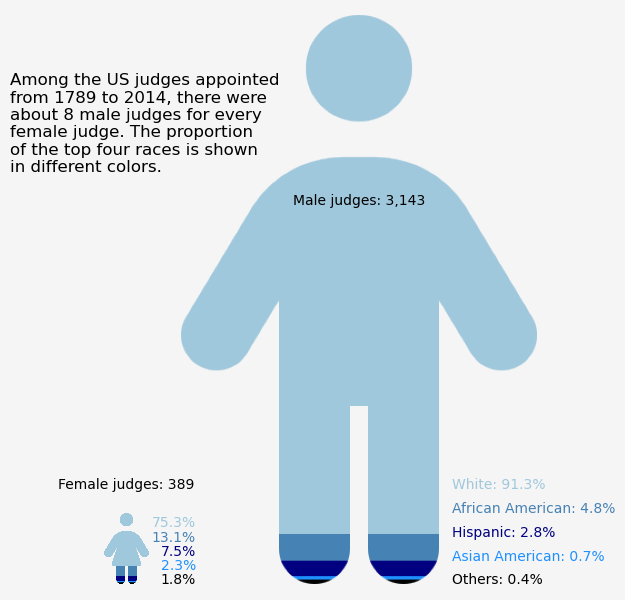

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import textwrap

# Define race colors
race_colors = {
    'White': (160, 200, 220), 
    'African American': (70, 130, 180),
    'Hispanic': (0, 0, 128), 
    'Asian American': (30, 144, 255),  
    'Others': (0, 0, 0)  
}
df_grouped_dict = df_grouped.groupby("gender").apply(lambda x: dict(zip(x["race"], x["judge_id"]))).to_dict()

df_percentages = {gender: {race: (count / sum(race_counts.values())) * 100 for race, count in race_counts.items()}
                  for gender, race_counts in df_grouped_dict.items()}

# Function to recolor an icon with stacked race colors
def recolor_icon_layers(icon_path, race_counts, race_colors):
    img = Image.open(icon_path).convert("RGBA")  # Convert to RGBA
    data = np.array(img)  # Convert image to array

    total_count = sum(race_counts.values())
    height = data.shape[0]
    y_start = 0

    for race, count in race_counts.items():
        layer_height = int((count / total_count) * height)
        y_end = y_start + layer_height
        mask = data[y_start:y_end, :, 3] > 0  # Keep only non-transparent pixels
        data[y_start:y_end, :, :-1][mask] = race_colors.get(race, (128, 128, 128))  # Apply race color
        y_start = y_end

    return Image.fromarray(data)

fig, ax = plt.subplots(figsize=(6, 4))

# Calculate total counts for scaling
total_category1 = sum(df_grouped_dict.get("F", {}).values())
total_category2 = sum(df_grouped_dict.get("M", {}).values())

race_colors_mpl = {race: (r/255, g/255, b/255) for race, (r, g, b) in race_colors.items()}

for i, (category, race_counts) in enumerate(df_grouped_dict.items()):
    icon_path = "person-dress.png" if category == "F" else "person.png"
    icon_array = recolor_icon_layers(icon_path, race_counts, race_colors)

    scale_factor = sum(race_counts.values()) / max(total_category1, total_category2)
    base_zoom = 0.8  # Adjust zoom level
    imagebox = OffsetImage(np.array(icon_array), zoom=base_zoom * scale_factor)

    ab = AnnotationBbox(imagebox, (i, 0), frameon=False, xycoords="data", box_alignment=(0.5, 0))
    ax.add_artist(ab)

    percentages = df_percentages[category]
    for j, (race, percent) in enumerate(reversed(percentages.items())):
        if(category == "F"):
            ax.text(i+0.3, j*150, f"{percent:.1f}%", ha='right', fontsize=10, color=race_colors_mpl[race])
        else:            
            ax.text(i+0.4, j*250, f"{race}: {percent:.1f}%", ha='left', fontsize=10, color=race_colors_mpl[race])

ax.text(0, 1000, f"Female judges: {total_category1}", ha='center', fontsize=10, color="black")
ax.text(1, 4000, f"Male judges: {total_category2:,}", ha='center', fontsize=10, color="black")

ax.set_xticks([0, 1])
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(0, max(total_category1, total_category2) + 100)
title = f"Among the US judges appointed from {judges_appointments['commission_date'].dt.year.min():.0f} to {judges_appointments['commission_date'].dt.year.max():.0f}, there were about 8 male judges for every female judge. The proportion of the top four races is shown in different colors."
wrapped_title = "\n".join(textwrap.wrap(title, width=30))
ax.set_title(wrapped_title, loc='left', pad=75)
ax.axis("off")
fig.patch.set_facecolor("whitesmoke")
fig.savefig("judges_appoint.png", bbox_inches="tight", dpi=300)
plt.show()